In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline 
sns.set()

In [ ]:
!pip3 install pandas-profiling==3.1.0

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов. 



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Решение

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/Netflix Shows.csv


In [4]:
%matplotlib inline
plt.rcParams['font.size'] = 18

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

sns.set(font_scale = 1.5)

In [6]:
data = pd.read_csv("/kaggle/input/netflix-shows/Netflix Shows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [7]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#Переименуем столбцы
data = data.rename(columns = {'ratingLevel' : 'rating_level', 'release year' : 'release_year', 'user rating score' : 'user_rating_score'})

In [9]:
data.columns

Index(['title', 'rating', 'rating_level', 'release_year', 'user_rating_score'], dtype='object')

Датасет имеет 1000 строк, 5 столбцов, 454 пропуска, 3 категориальных столбца и 2 числовых, 148 дублируемых строк, 496 уникальных названия шоу, 59 пропусков в столбце ratingLevel, 395 пропусков в столбце user rating score

In [10]:
print('Количество дупликатов:', data.duplicated().sum())

Количество дупликатов: 500


### Удалите из данных дупликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [11]:
duplicates = data[data.duplicated()].sort_values(by = 'title')
duplicates = duplicates.drop_duplicates()
duplicates

,title,rating,rating_level,release_year,user_rating_score
396,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
201,30 Rock,TV-14,Parents strongly cautioned. May be unsuitable ...,2012,66.0
218,5 to 7,R,some sexual material,2014,NaN
265,90210,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,62.0
879,A Monster in Paris,PG,"some action violence involving gunplay, and mi...",2011,NaN
...,...,...,...,...,...
221,Unbreakable Kimmy Schmidt,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN
793,Walt Disney Animation Studios Short Films Coll...,TV-G,Suitable for all ages.,2015,84.0
878,We're Back! A Dinosaur's Story,G,General Audiences. Suitable for all ages.,1993,NaN
410,White Collar,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


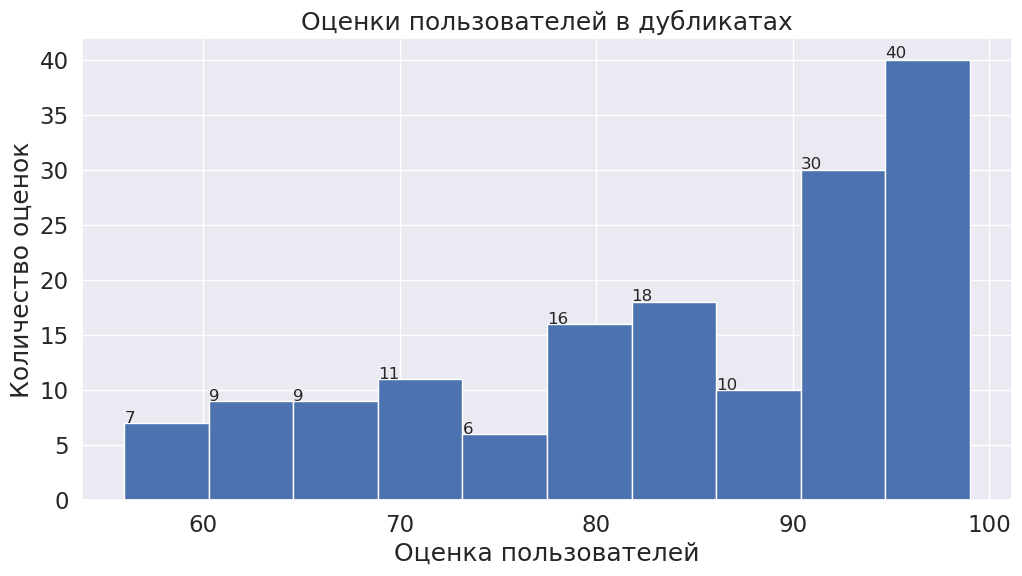

In [12]:
plt.figure(figsize=(12, 6))
ax = duplicates['user_rating_score'].hist(bins = 10)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005), size = 12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество оценок')
plt.title('Оценки пользователей в дубликатах');

In [13]:
# Посмотрим количетсво дупликатов в каждой группе
data[data.duplicated()]['rating'].value_counts()

TV-14       128
PG           94
G            85
TV-MA        66
TV-Y         32
TV-PG        26
TV-G         23
TV-Y7-FV     19
TV-Y7        15
R             5
NR            4
PG-13         3
Name: rating, dtype: int64

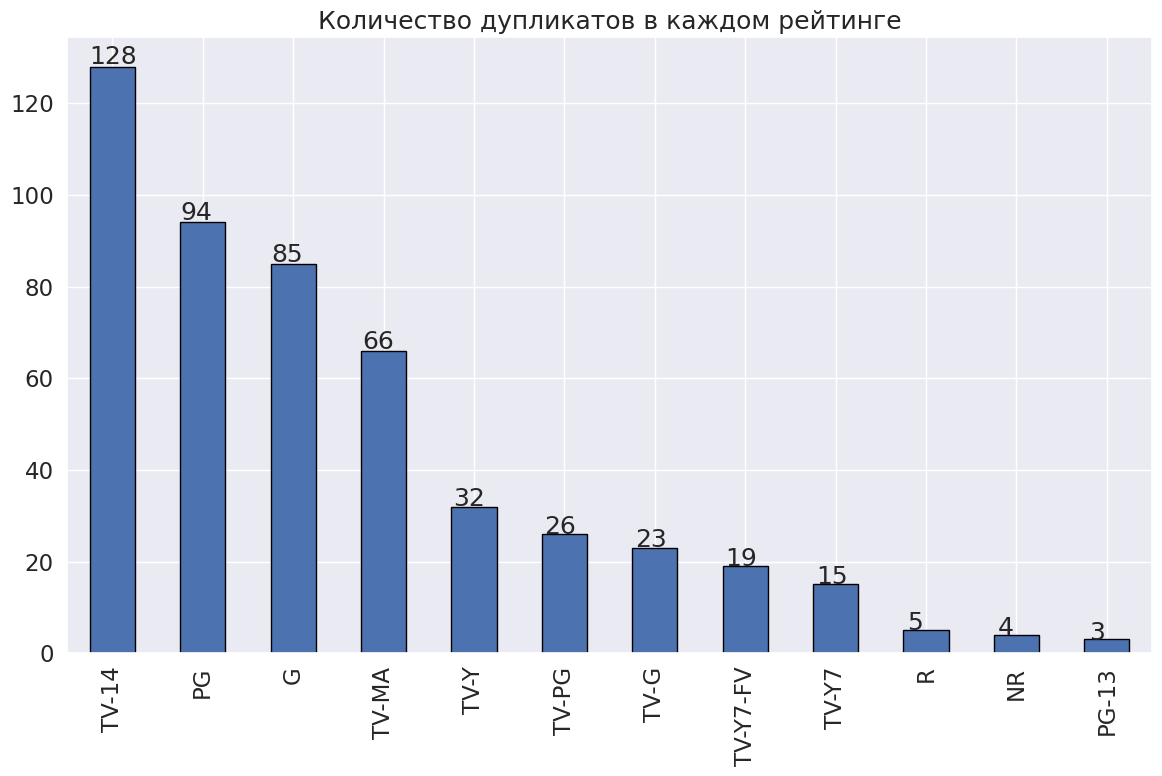

In [14]:
plt.figure(figsize=(14, 8))
ax = data[data.duplicated()]['rating'].value_counts().plot.bar(edgecolor='black')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Количество дупликатов в каждом рейтинге');

In [15]:
df = data.drop_duplicates().reset_index(drop=True)

In [16]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
dupl_title = df[df['title'].duplicated()]['title'].values

In [18]:
df[df['title'].isin(dupl_title)].sort_values(by='title')

,title,rating,rating_level,release_year,user_rating_score
128,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
257,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
321,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
366,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0
119,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
135,Skins,TV-MA,NaN,2017,NaN
269,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
276,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


In [19]:
df['rating_level'].sort_values().unique()[:15]

array(['For mature audiences.  May not be suitable for children 17 and under.',
       'For some rude and suggestive material, and for language.',
       'General Audiences. Suitable for all ages.',
       'Parental guidance suggested. May not be suitable for all children.',
       'Parental guidance suggested. May not be suitable for children.',
       'Parents strongly cautioned. May be inappropriate for children under 13.',
       'Parents strongly cautioned. May be unsuitable for children ages 14 and under.',
       'Restricted. May be inappropriate for children 17 and under.',
       'Suitable for all ages.', 'Suitable for children ages 7 and older',
       'Suitable for children ages 7 and older.  Content contains fantasy violence.',
       'This movie has not been rated.',
       'This movie has not been rated. Intended for adults only and may contain sex, violence, drugs, language or other adult themes.',
       'action and rude humor', 'action and some rude humor'],
      dtyp

In [20]:
rtg_lvl = df[df['rating_level'].isna()]
rtg_lvl

,title,rating,rating_level,release_year,user_rating_score
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
31,Opera╠ñ╠╡es Especiais,TV-MA,NaN,2015,NaN
39,Girlboss,TV-MA,NaN,2017,94.0
42,Sand Castle,TV-MA,NaN,2017,89.0
44,Sandy Wexler,TV-14,NaN,2017,92.0
45,O Amor no Div╠ú,TV-MA,NaN,2016,NaN
46,Stronger Than the World,NR,NaN,2016,NaN
48,Happily Married,TV-14,NaN,2015,NaN
49,Pandora,TV-MA,NaN,2016,NaN
72,Ingobernable,TV-MA,NaN,2017,96.0


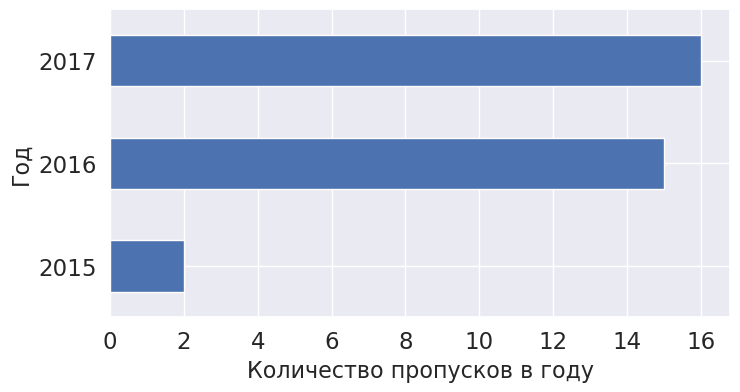

In [21]:
fig = plt.figure(figsize=(8,4))
rtg_lvl.groupby('release_year')['title'].count().plot.barh()
plt.ylabel('Год', fontsize=16)
plt.xlabel('Количество пропусков в году', fontsize=16);

In [22]:
#Добавим категорию фильм или сериал
def group(row):
    if 'TV' in row:
        cat ='TV_show'
    else:
        cat ='Movie'
    return cat

In [23]:
df['type'] = df['rating'].apply(group)

In [24]:
#Добавим категорию с пропусками
def test(raw):
  if raw > 0:
    cat = 'Clear'
  else:
    cat = 'Missed'
  return cat

In [25]:
df['miss'] = df['user_rating_score'].apply(test)

In [26]:
df

,title,rating,rating_level,release_year,user_rating_score,type,miss
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0,Movie,Clear
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,Movie,Missed
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,TV_show,Clear
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,TV_show,Clear
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,TV_show,Clear
...,...,...,...,...,...,...,...
495,Russell Madness,PG,some rude humor and sports action,2015,NaN,Movie,Missed
496,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN,Movie,Missed
497,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN,Movie,Missed
498,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN,TV_show,Missed


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


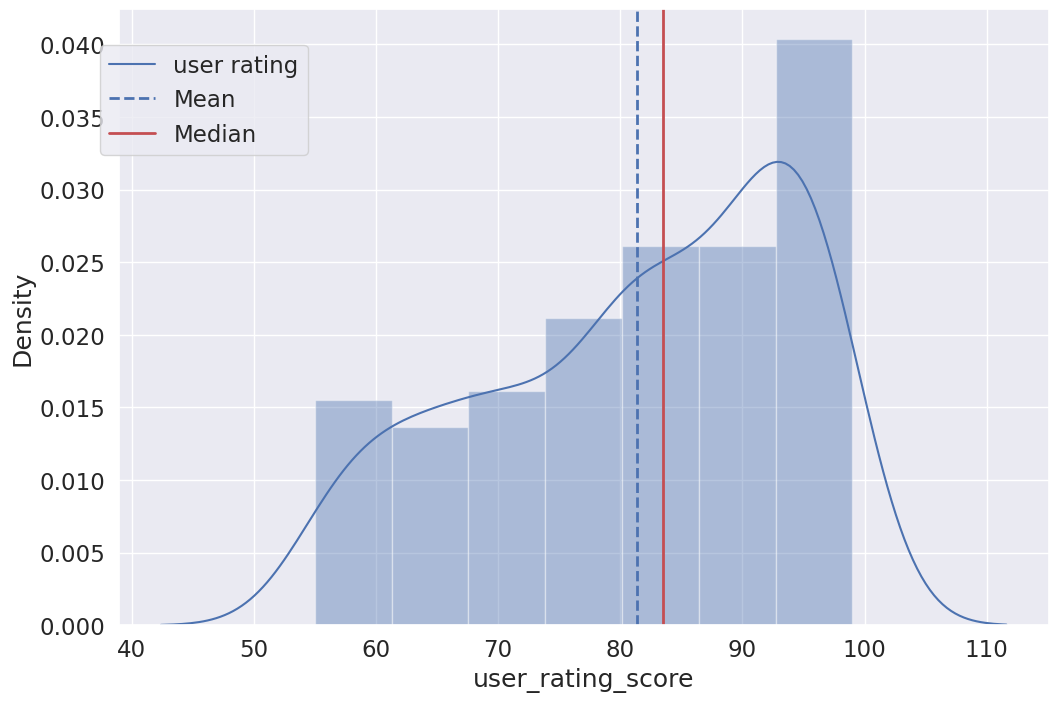

In [27]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(df['user_rating_score'])
plt.axvline(df['user_rating_score'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['user_rating_score'].median(), color='r', linestyle='-', linewidth=2)
fig.legend(labels=['user rating', 'Mean','Median'], loc='upper left', bbox_to_anchor=(0.1, 0.85))
plt.show();


In [28]:
print("Медиана: {}".format(df['user_rating_score'].median()))
print("Среднее : {}".format(df['user_rating_score'].mean()))

Медиана: 83.5
Среднее : 81.3984375


Т.к. в столбце user rating score почти 50% пропусков, то заполнение их средним или медианой приведет, что плотность распределение сместится к среднему или медиане

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


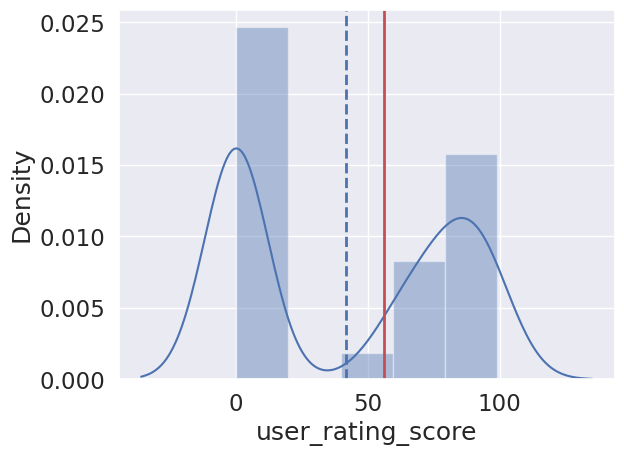

In [29]:
#При заполнении пропусков 0
sns.distplot(df['user_rating_score'].fillna(0))
plt.axvline(df['user_rating_score'].fillna(0).mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['user_rating_score'].fillna(0).median(), color='r', linestyle='-', linewidth=2);

### Сколько рейтинговых групп представлено в данных?

In [30]:
dt = df['rating'].value_counts()
print('Количество уникальных рейтинговых групп:', len(dt))

Количество уникальных рейтинговых групп: 13


In [31]:
dt

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

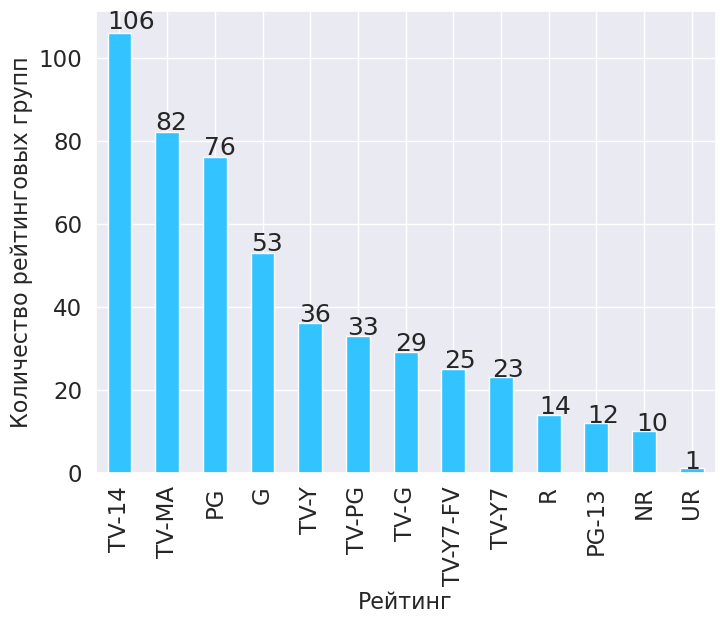

In [34]:
plt.figure(figsize=(8, 6))
ax = dt.plot.bar(ec='white',color='#33C4FF')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.007, p.get_height() * 1.009))
plt.xlabel('Рейтинг', fontsize=16)
plt.ylabel('Количество рейтинговых групп', fontsize=16);

### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?
- Совпадают ли оценки у диблей?

In [35]:
rating_score=df[df['miss'] == 'Clear'].groupby("user_rating_score")['title'].count().reset_index().sort_values(by='user_rating_score',ascending=False).reset_index(drop=True).sort_values(by = 'title', ascending = False)
rating_score.head(10)

,user_rating_score,title
2,97.0,12
3,96.0,12
1,98.0,12
4,95.0,11
8,91.0,11
17,81.0,9
6,93.0,9
11,88.0,9
5,94.0,8
7,92.0,8


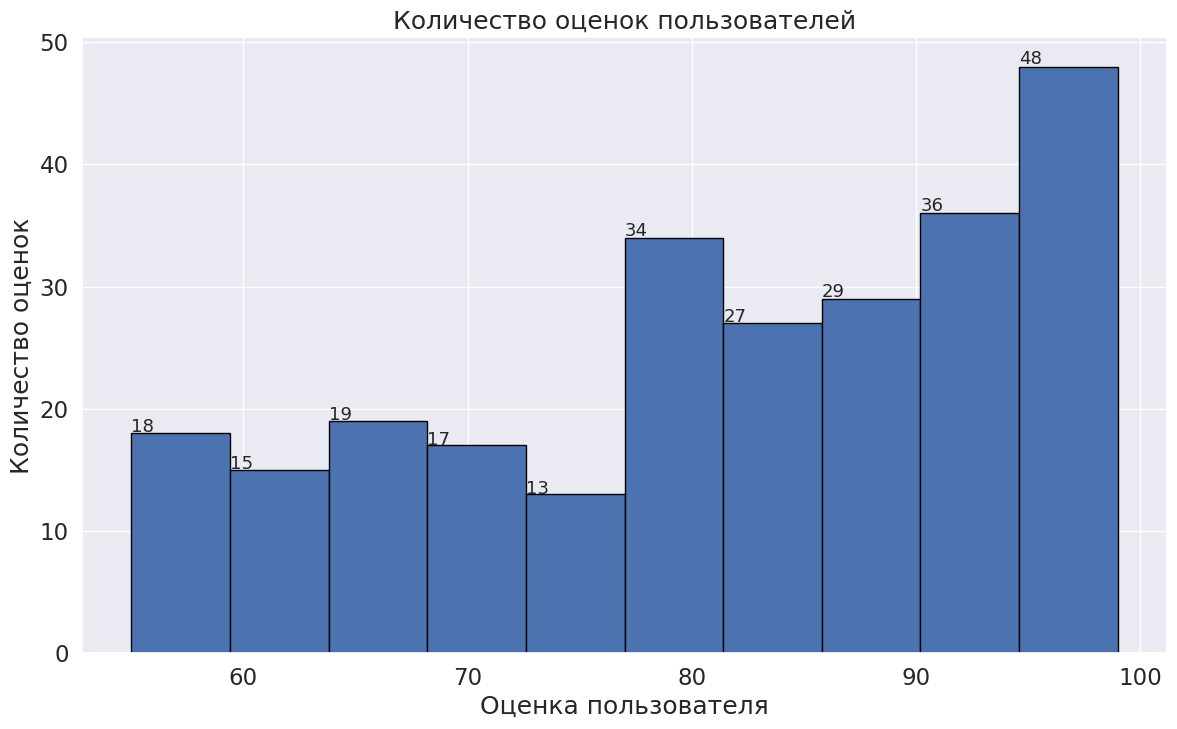

In [36]:
plt.figure(figsize=(14,8))
ax = df['user_rating_score'].hist(bins = 10, edgecolor = 'black')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005), size = 13)
ax.set(xlabel='Оценка пользователя', ylabel='Количество оценок', title = 'Количество оценок пользователей')
plt.show();

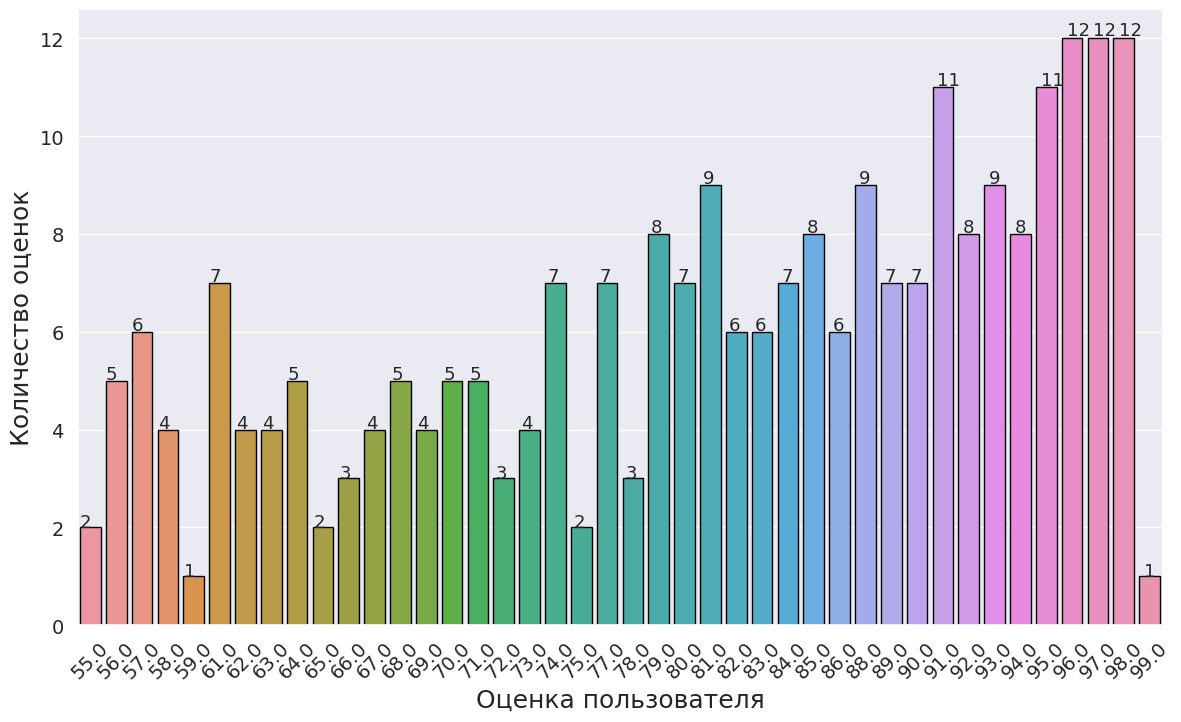

In [37]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='user_rating_score',y='title',data=rating_score, edgecolor = 'black')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size =13)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
ax.set(xlabel='Оценка пользователя', ylabel='Количество оценок');

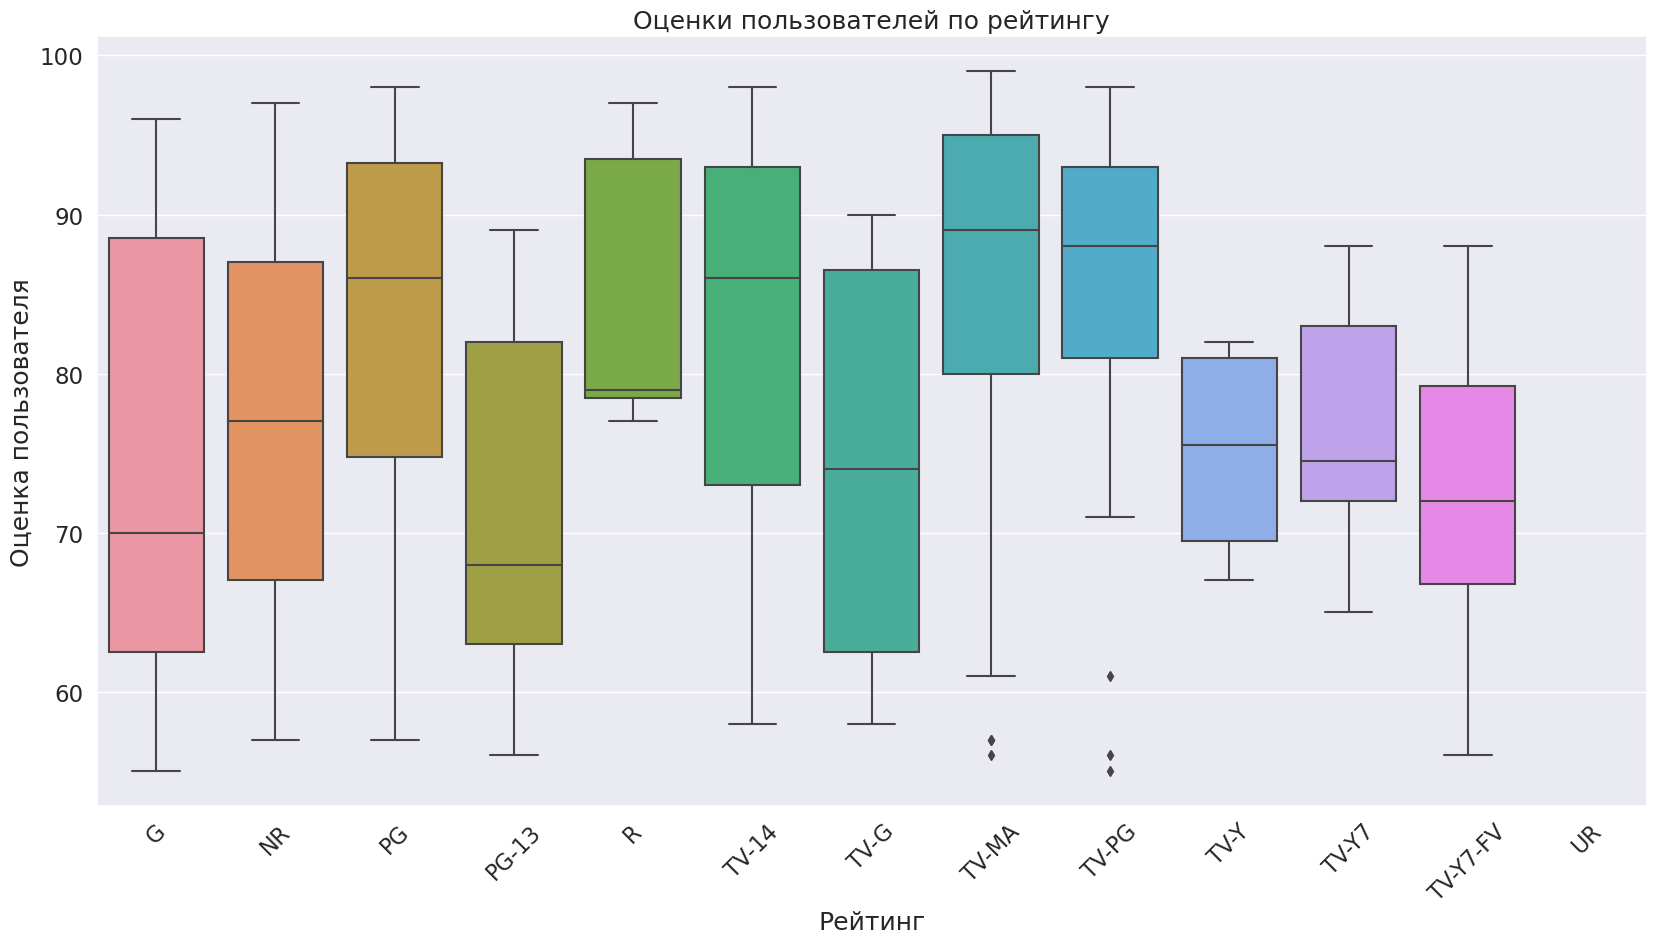

In [38]:
order = np.sort(df['rating'].unique())
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df, y='user_rating_score', x='rating',order=order)
plt.xticks(rotation=45, fontsize = 16)
ax.set(xlabel='Рейтинг', ylabel='Оценка пользователя', title = 'Оценки пользователей по рейтингу');

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

In [39]:
df.describe()

,release_year,user_rating_score
count,500.000000,256.000000
mean,2010.976000,81.398438
std,7.829305,12.730904
min,1940.000000,55.000000
25%,2009.000000,71.000000
50%,2014.000000,83.500000
75%,2016.000000,93.000000
max,2017.000000,99.000000


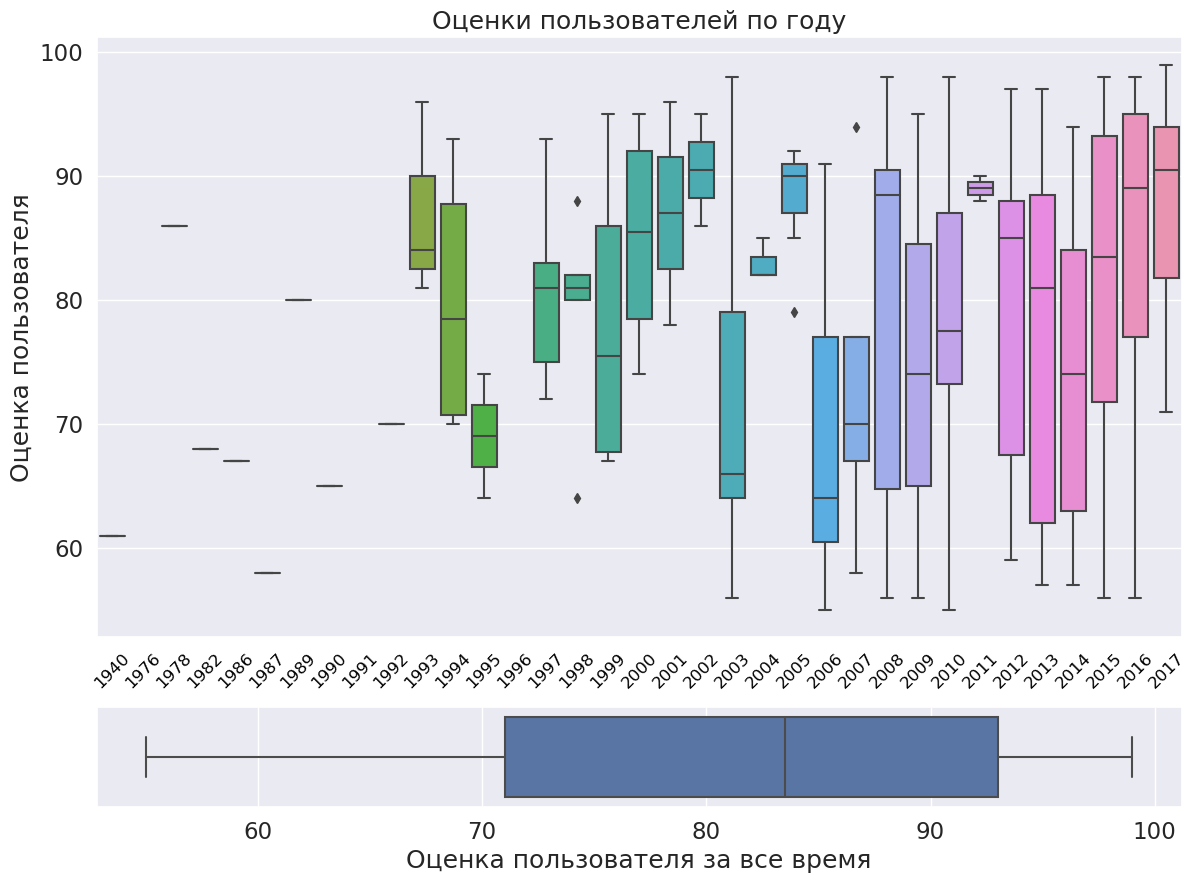

In [40]:
fig, axes = plt.subplots(2, figsize=(14, 10), gridspec_kw={'height_ratios': [6, 1]})
axes[0].tick_params(axis = 'x', rotation=45, colors='black',
              labelsize = 12, grid_alpha=0.5)
sns.boxplot(x = df['release_year'], y = df['user_rating_score'], ax=axes[0])
axes[0].set(xlabel='', ylabel='Оценка пользователя', title = 'Оценки пользователей по году')
sns.boxplot(x = df['user_rating_score'], ax=axes[1], orient = 'h')
axes[1].set(xlabel='Оценка пользователя за все время');

### В какие годы были запущены шоу, представленные в датасете?

In [41]:
np.sort(df['release_year'].unique())

array([1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

In [42]:
grouped = df.groupby(['release_year', 'miss'])['miss'].count().reset_index(name="count")

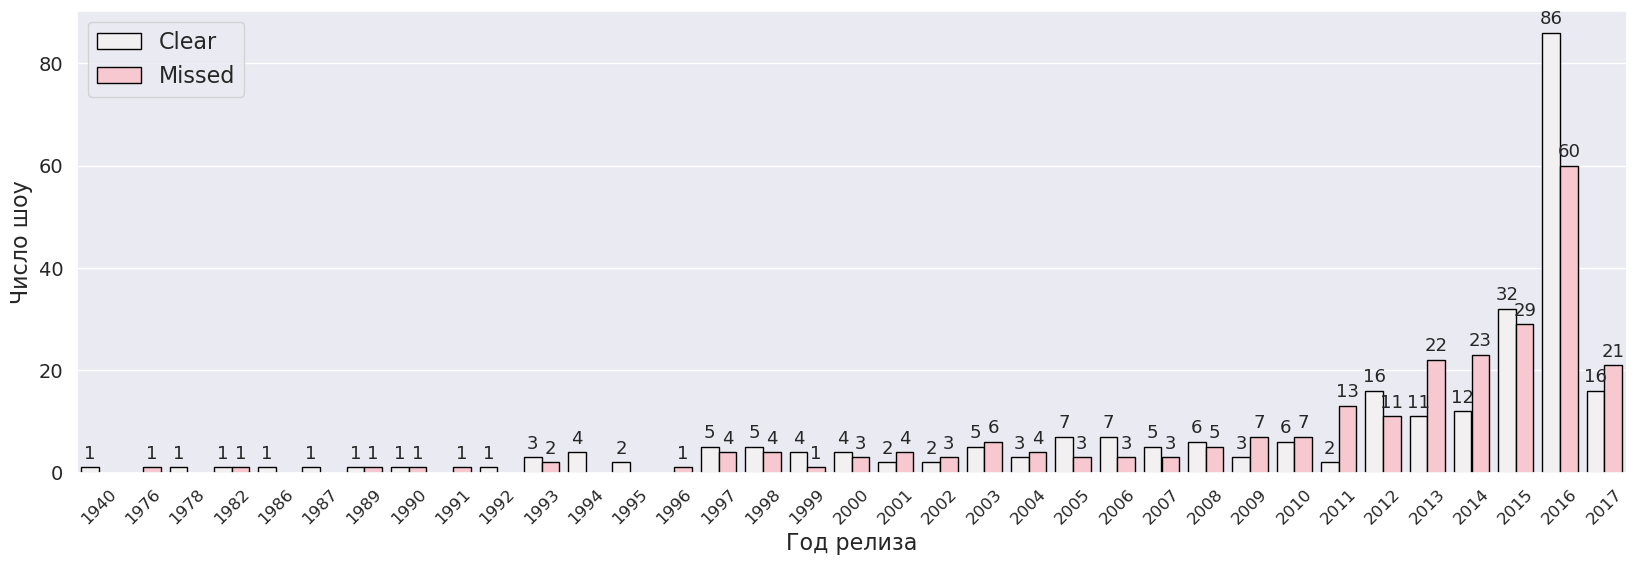

In [43]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x='release_year', y='count', hue='miss', data=grouped, color='pink', edgecolor = 'black')
plt.xlabel('Год релиза', fontsize=16)
plt.ylabel('Число шоу', fontsize=16)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', size = 13)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 14)
box = ax.get_position()
#ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 #box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc=2, prop={'size': 16})
plt.show()

Рост наблюдается, выбросы есть в 2016 году, поэтому рассмотрим его более детально

In [44]:
print('Количество пропусков в рейтинге пользователей в 2016 году:', grouped[(grouped['release_year'] == 2016) & (grouped['miss'] == 'Missed')]['count'].iloc[0])
print('Количество оценок пользователей в 2016 году:', grouped[(grouped['release_year'] == 2016) & (grouped['miss'] == 'Clear')]['count'].iloc[0])

Количество пропусков в рейтинге пользователей в 2016 году: 60
Количество оценок пользователей в 2016 году: 86


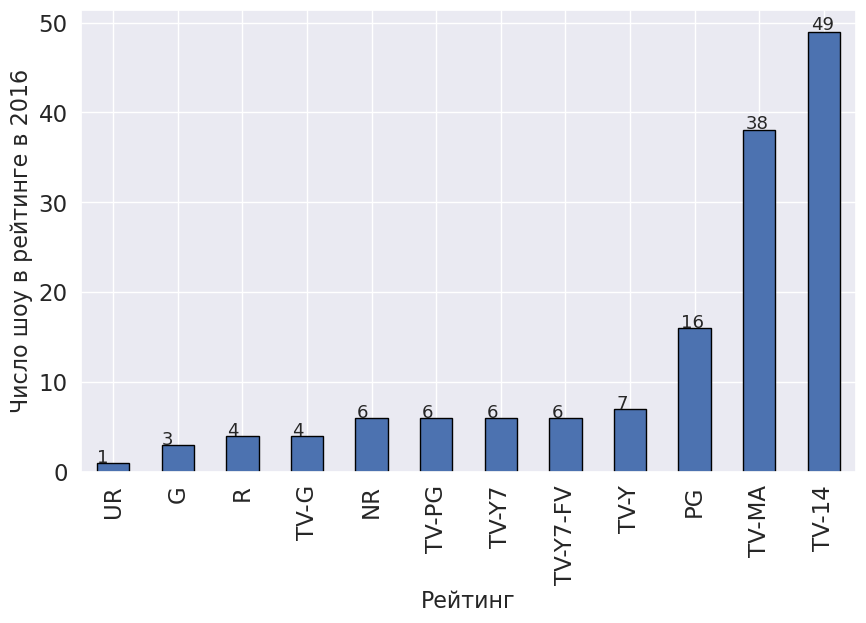

In [45]:
plt.figure(figsize=(10,6))
ax = df[df['release_year'] == 2016].groupby('rating').size().sort_values().plot.bar(edgecolor = 'black')
plt.xlabel('Рейтинг', fontsize=16)
plt.ylabel('Число шоу в рейтинге в 2016', fontsize=16)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size =13)
plt.show()

In [46]:
df[df['release_year'] == 2016].groupby('type')['rating'].count()

type
Movie       30
TV_show    116
Name: rating, dtype: int64

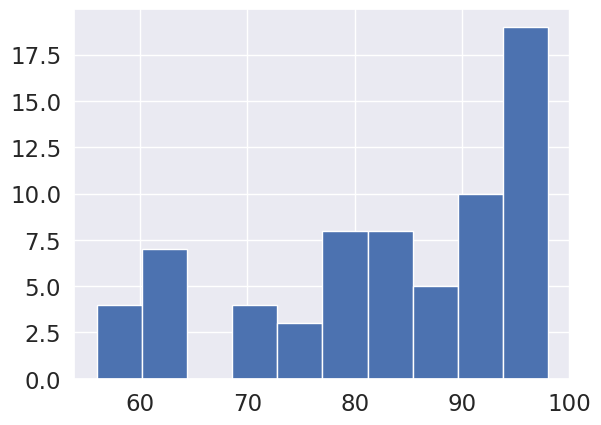

In [47]:
df[(df['release_year'] == 2016) & (df['type'] == 'TV_show') & (df['miss'] == 'Clear')]['user_rating_score'].hist();

Выбросы представляют из себя количество выпущенных шоу в 2016 году. Это связано с TV_show

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



In [48]:
print('Средняя оценка пользователей за 2016 год:', round(df[df['release_year'] == 2016]['user_rating_score'].mean(), 2))
print('Средняя оценка пользователей за 2017 год:', round(df[df['release_year'] == 2017]['user_rating_score'].mean(), 2))

Средняя оценка пользователей за 2016 год: 84.31
Средняя оценка пользователей за 2017 год: 88.12


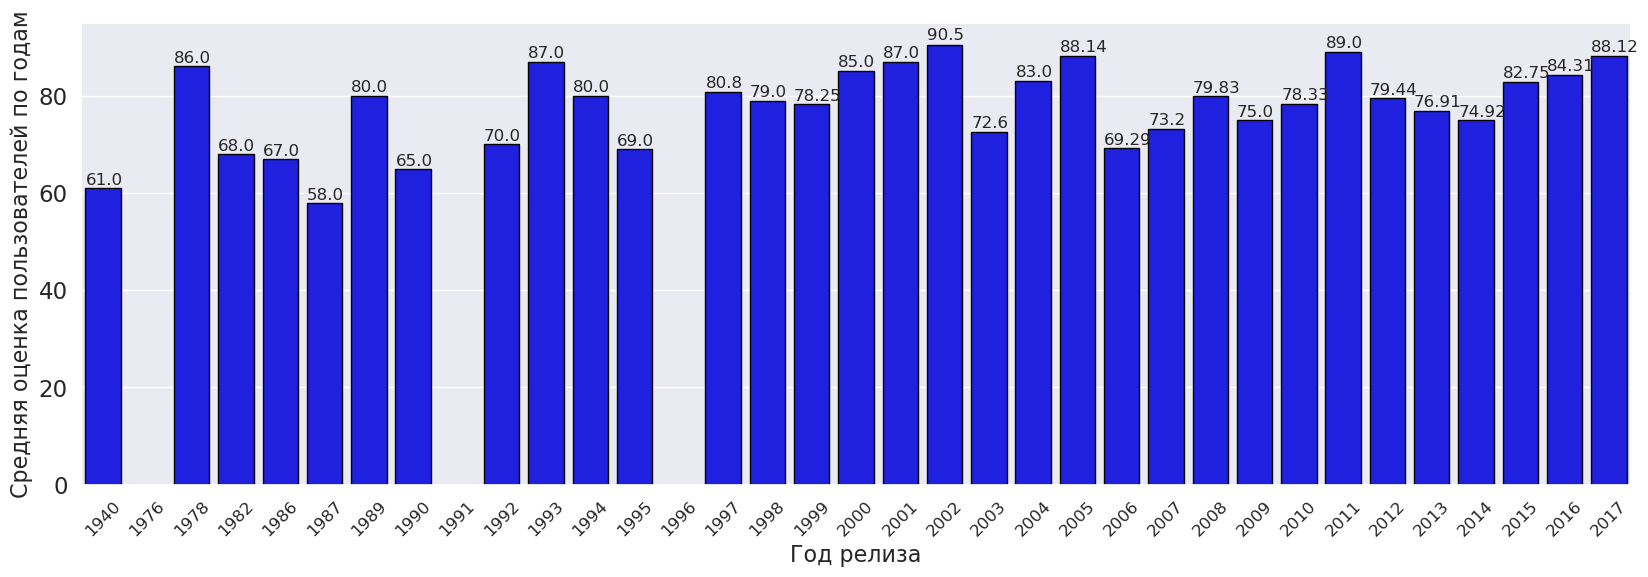

In [49]:
plt.figure(figsize=(20,6))

graphic = df.groupby('release_year')['user_rating_score'].mean()
ax = sns.barplot(x=graphic.index, y = graphic.values, color='blue', edgecolor = 'black')

plt.xlabel('Год релиза', fontsize=16)
plt.ylabel('Средняя оценка пользователей по годам', fontsize=16)
plt.xticks(rotation=45, fontsize = 12)
for p in ax.patches:
    ax.annotate(round(float(p.get_height()), 2), (p.get_x() * 1, p.get_height() * 1.01), size = 12)
plt.show()

In [50]:
graphic.values

array([61.        ,         nan, 86.        , 68.        , 67.        ,
       58.        , 80.        , 65.        ,         nan, 70.        ,
       87.        , 80.        , 69.        ,         nan, 80.8       ,
       79.        , 78.25      , 85.        , 87.        , 90.5       ,
       72.6       , 83.        , 88.14285714, 69.28571429, 73.2       ,
       79.83333333, 75.        , 78.33333333, 89.        , 79.4375    ,
       76.90909091, 74.91666667, 82.75      , 84.31395349, 88.125     ])

Так как данные за 2017 неполные, то однозначно сказать нельзя, но по графику можно предположить, что 2017 год будет успешнее. Также успешность можно оценить по сумме выручки, прибыли и количеству выпущенных шоу



In [51]:
last_df = df[(df['release_year'] == 2016) | (df['release_year'] == 2017)]
last_df

,title,rating,rating_level,release_year,user_rating_score,type,miss
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,TV_show,Clear
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0,TV_show,Clear
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0,TV_show,Clear
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0,TV_show,Clear
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0,TV_show,Clear
...,...,...,...,...,...,...,...
441,Quackerz,PG,"rude and suggestive humor, and some action",2016,NaN,Movie,Missed
460,Puffin Rock,TV-Y,Suitable for all ages.,2016,NaN,TV_show,Missed
461,The Mr. Peabody and Sherman Show,TV-Y7,Suitable for children ages 7 and older,2017,NaN,TV_show,Missed
465,LEGO Jurassic World: The Indominus Escape,TV-Y7,Suitable for children ages 7 and older,2016,NaN,TV_show,Missed


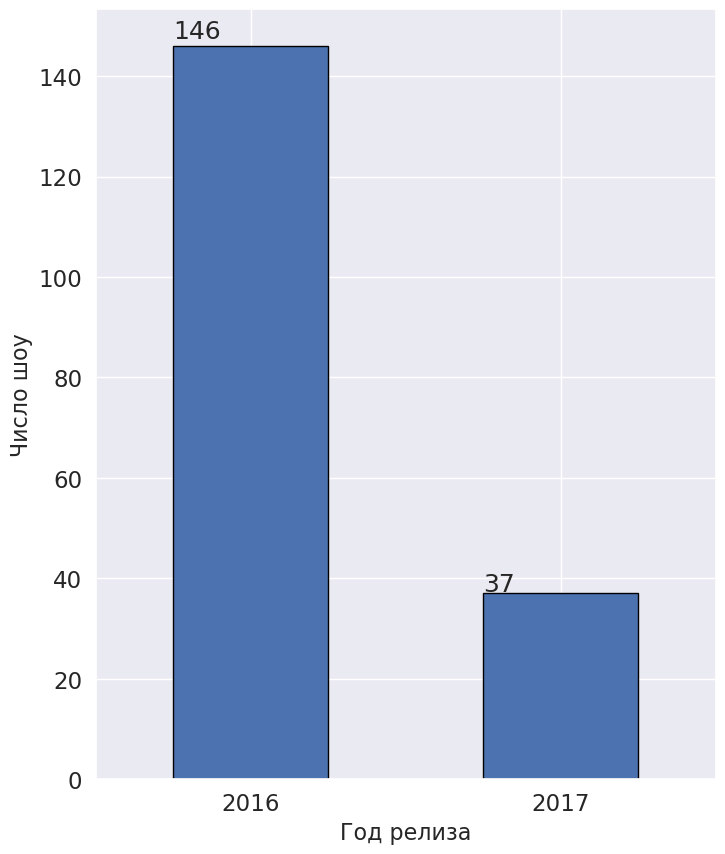

In [52]:
plt.figure(figsize=(8,10))
ax = last_df.groupby('release_year')['title'].count().plot.bar(rot=0, edgecolor = 'black')
plt.xlabel('Год релиза', fontsize=16)
plt.ylabel('Число шоу', fontsize=16)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))
plt.show()

In [53]:
last_df

,title,rating,rating_level,release_year,user_rating_score,type,miss
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,TV_show,Clear
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0,TV_show,Clear
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0,TV_show,Clear
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0,TV_show,Clear
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0,TV_show,Clear
...,...,...,...,...,...,...,...
441,Quackerz,PG,"rude and suggestive humor, and some action",2016,NaN,Movie,Missed
460,Puffin Rock,TV-Y,Suitable for all ages.,2016,NaN,TV_show,Missed
461,The Mr. Peabody and Sherman Show,TV-Y7,Suitable for children ages 7 and older,2017,NaN,TV_show,Missed
465,LEGO Jurassic World: The Indominus Escape,TV-Y7,Suitable for children ages 7 and older,2016,NaN,TV_show,Missed


In [54]:
last_df = last_df.groupby(['release_year', 'type'])['title'].count().reset_index(name="count")

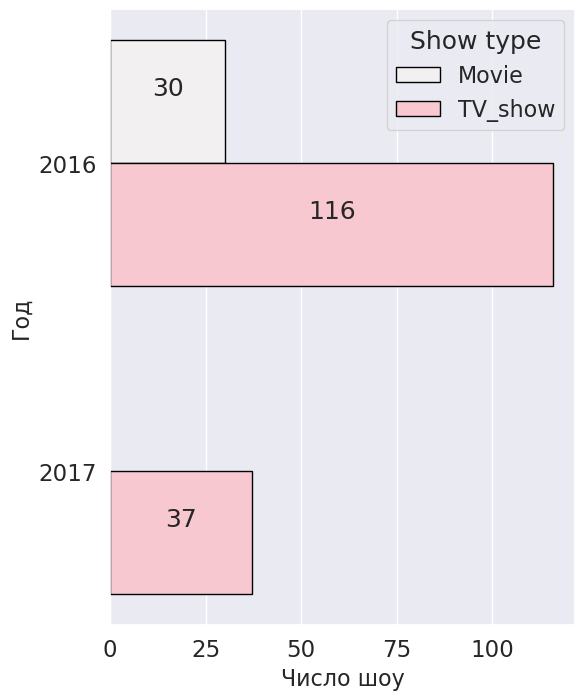

In [55]:
fig = plt.figure(figsize=(6, 8))
ax = sns.barplot(x='count', y = 'release_year', hue='type', data=last_df, color='pink', edgecolor = 'black', orient = 'h')
plt.xlabel('Число шоу', fontsize=16)
plt.ylabel('Год', fontsize=16)
for p in ax.patches:
  try:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  except:
    ax.annotate(f'0', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.legend(title = 'Show type', prop={'size': 16});

В 2017 году нет данных по фильмам

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

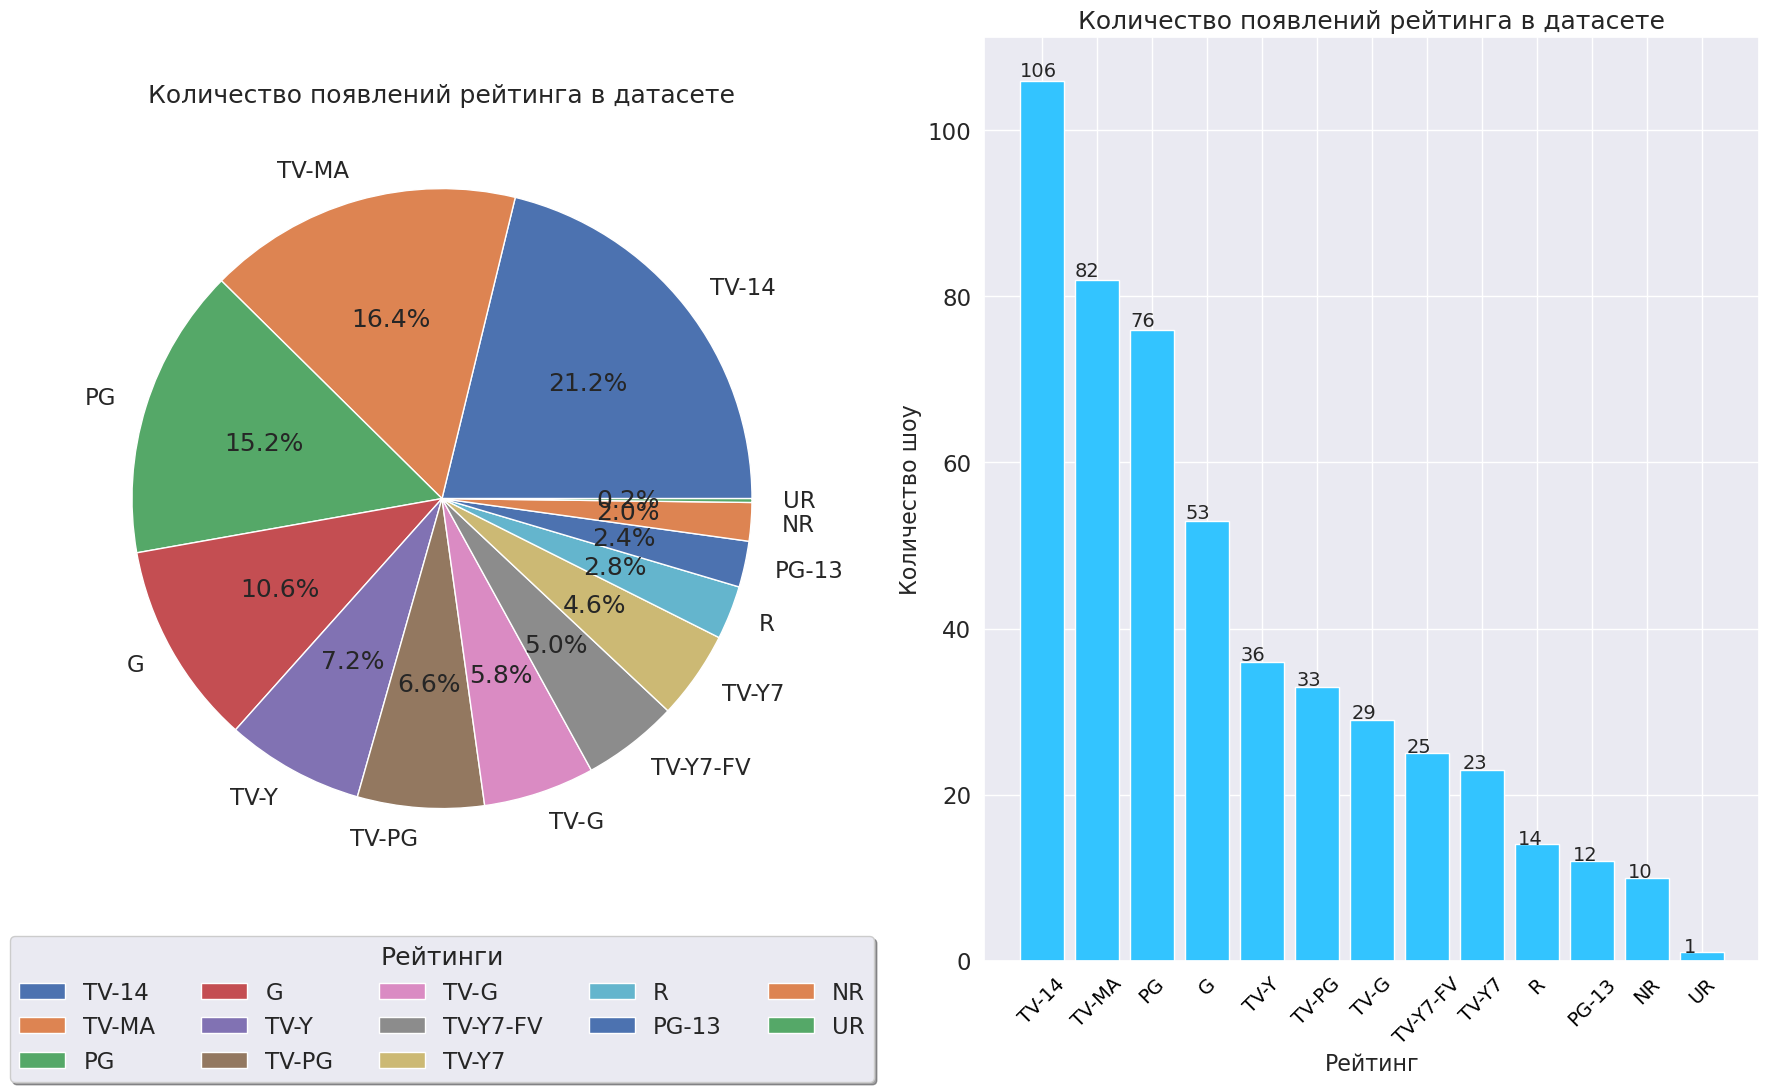

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(22,12))
ax[0].pie(dt, autopct="%.1f%%", labels = dt.index)
ax[0].legend(dt.index,
          title ="Рейтинги",
          loc ="lower center",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, title="Рейтинги")
ax[0].set_title("Количество появлений рейтинга в датасете")
ax[1].bar(dt.index, height = dt,ec='white',color='#33C4FF')
ax[1].set_title("Количество появлений рейтинга в датасете")
ax[1].tick_params(axis = 'x', rotation=45, colors='black',
              labelsize = 14)
plt.xlabel('Рейтинг', fontsize=16)
plt.ylabel('Количество шоу', fontsize=16)
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size = 14)

plt.show();

Нагляднее круговая диаграмма

In [58]:
gr = df.groupby(['release_year', 'rating'])['title'].count().reset_index().rename(columns={'title':'counts'})

In [59]:
gr = gr[gr['release_year']> 2010]

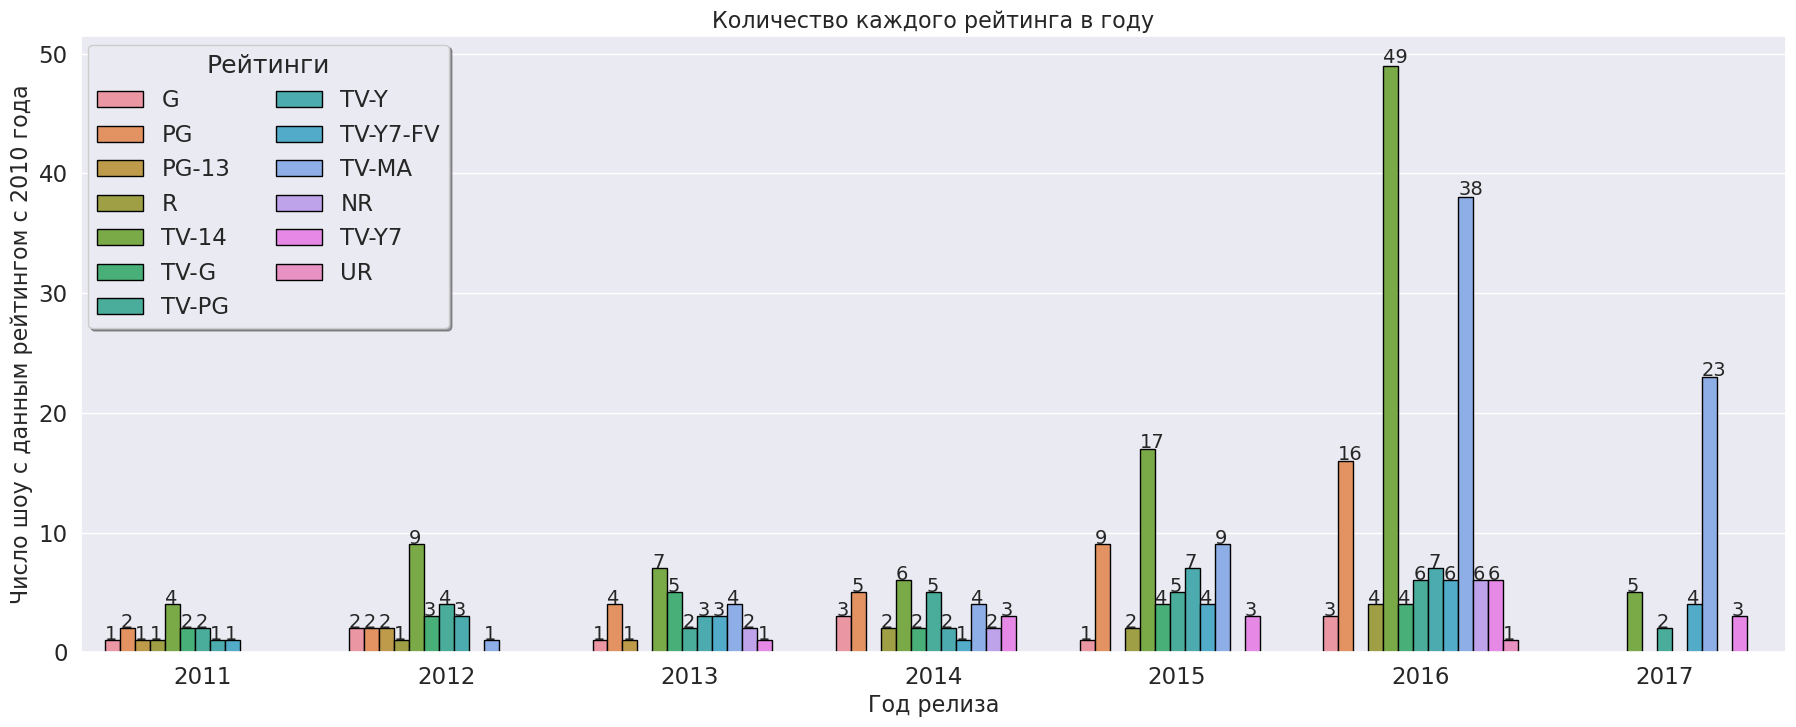

In [60]:
plt.figure(figsize=(22, 8))
ax = sns.barplot(data = gr, x = 'release_year', y = 'counts', hue = 'rating', edgecolor='black')
plt.xlabel('Год релиза', fontsize=16)
plt.ylabel('Число шоу с данным рейтингом с 2010 года', fontsize=16)
for p in ax.patches:
  try:
    ax.annotate(int(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005), size = 14)
  except:
    ax.annotate(p.get_height(), (p.get_x() * 1, p.get_height() * 1.005))
plt.title('Количество каждого рейтинга в году', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.11, 1.005),
          fancybox=True, shadow=True, ncol=2, title="Рейтинги")
plt.show();


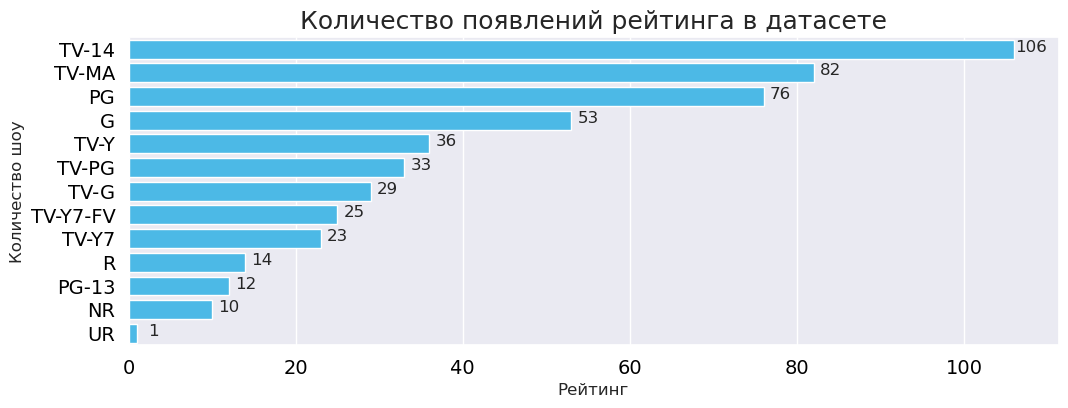

In [63]:
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.barplot(x = dt.values, y = dt.index,ec='white',color='#33C4FF', orient = 'h')
ax.set_title("Количество появлений рейтинга в датасете")
ax.tick_params(axis = 'x', colors='black',
              labelsize = 14)
ax.tick_params(axis = 'y', colors='black',
              labelsize = 14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество шоу', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width()+2, p.get_y() + p.get_height()+0.1), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', size =12)

plt.show();